<a href="https://colab.research.google.com/github/packetech/baracuda/blob/master/Credit_Card_Customers_clustering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font size="6" color="black">AllLife Credit Card Customer Segmentation</font></b>

### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

### Key Questions:
1.	How many different segments of customers are there?
2.	How are these segments different from each other?
3.	What are your recommendations to the bank on how to better market to and service these customers?


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore

## Exploratory Data Analysis 

In [ ]:
AllLife_df = pd.read_csv("Credit_Card_Customers_data.csv")
AllLife_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [ ]:
AllLife_df.shape

(660, 7)

In [ ]:
AllLife_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# dropping Serial number column, it has no bearing on customer spending pattern 
# dropping Customer key column, it has no bearing on spending pattern, since this appears to be a 
# randomly generated banking key for the customers transactions 

#AllLife_df = AllLife_df.drop(labels='Sl_No',axis=1) 

AllLife_df = AllLife_df.iloc[:,2:]

In [ ]:


#AllLife_df = AllLife_df.drop(labels='Customer Key',axis=1) 

In [ ]:
AllLife_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
AllLife_df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


The dataset looks ok, it is normal to have  zero counts

In [ ]:
# Univariate plots

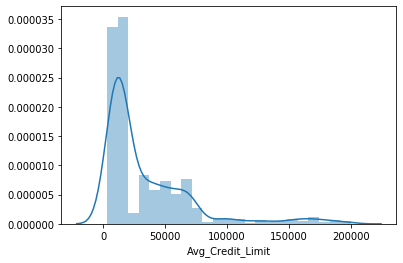

In [ ]:
sns.distplot(AllLife_df['Avg_Credit_Limit']) # what looks like 4 divisions or clusters are seen
                                            # we see that a lot of customers fell below 50,000 average credit limit given 
                                            # by the bank, this could only mean as the plot shows that lesser people were 
                                            # given more credits, showing that perhaps they had specialized jobs or are top
                                            # executives who have higher earning power

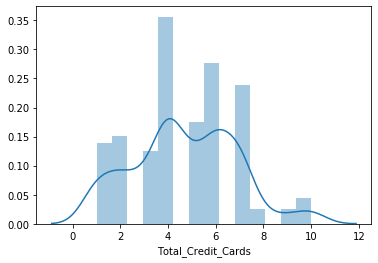

In [ ]:
sns.distplot(AllLife_df['Total_Credit_Cards']) # 5 peaks are visible

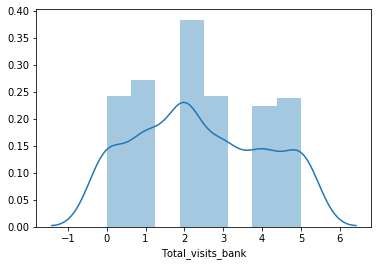

In [ ]:
sns.distplot(AllLife_df['Total_visits_bank']) # The visits to bank are in 3 categories and shows that quite a lot 
                                              # did not visit the bank at all 

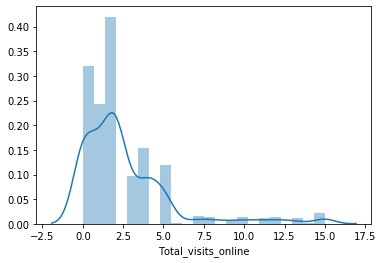

In [ ]:
sns.distplot(AllLife_df['Total_visits_online']) # we have dwindling degrees of online visit, but clearly more people 
                                                # either do not visit or visits less, could mean that either they have poor
                                                # internet services in that region or few were online literate or people 
                                                # were outrightly careless or too over worked to do anything online

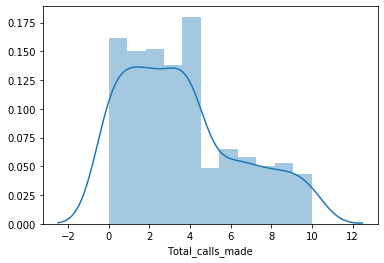

In [ ]:
sns.distplot(AllLife_df['Total_calls_made']) # About 2 clusters are seen

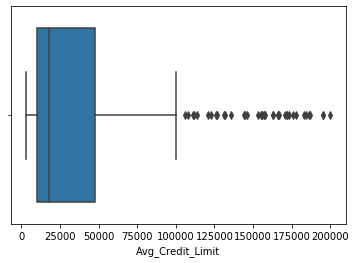

In [ ]:
sns.boxplot(AllLife_df.Avg_Credit_Limit) #exploring futher  Avg_Credit_Limit  and   Total_visits_online for outliers 
                                         # based on how their histogram plots appears

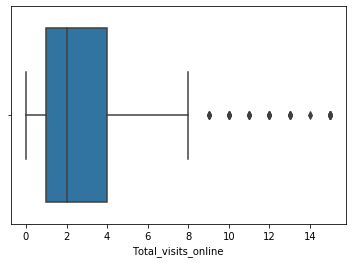

In [ ]:
sns.boxplot(AllLife_df.Total_visits_online)

OBSERVATIONS: 

1. Average credit limit and Total visits online have extreme  and lots of outliers and should be taken care of to clean up the dataset

In [ ]:
# Replacing outliers in Avg_Credit_Limit, using the descriptive analysis values

q3 = 48000.000000
q1 = 10000.000000
iqr = q3-q1 #inter quatile range
ub = q3+1.5*iqr #upper boundary
lb = q1-1.5*iqr #lower boundary
median = float(AllLife_df['Avg_Credit_Limit'].median())

AllLife_df["Avg_Credit_Limit"] = np.where(AllLife_df["Avg_Credit_Limit"] > ub, median, AllLife_df['Avg_Credit_Limit'])
AllLife_df["Avg_Credit_Limit"] = np.where(AllLife_df["Avg_Credit_Limit"] < lb, median, AllLife_df['Avg_Credit_Limit'])


In [ ]:
# Replacing outliers in Total_visits_online, using the descriptive analysis values

q3 = 4.000000
q1 = 1.000000
iqr = q3-q1 #inter quatile range
ub = q3+1.5*iqr #upper boundary
lb = q1-1.5*iqr #lower boundary
median = float(AllLife_df['Total_visits_online'].median())

AllLife_df["Total_visits_online"] = np.where(AllLife_df["Total_visits_online"] > ub, median, AllLife_df['Total_visits_online'])
AllLife_df["Total_visits_online"] = np.where(AllLife_df["Total_visits_online"] < lb, median, AllLife_df['Total_visits_online'])


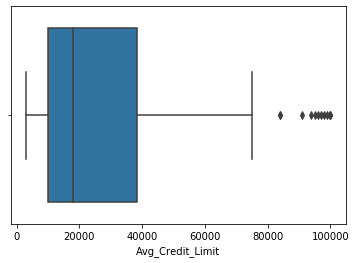

In [ ]:
sns.boxplot(AllLife_df.Avg_Credit_Limit) # Still have some outliers but better than before

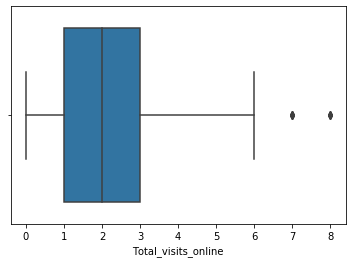

In [ ]:
sns.boxplot(AllLife_df.Total_visits_online)

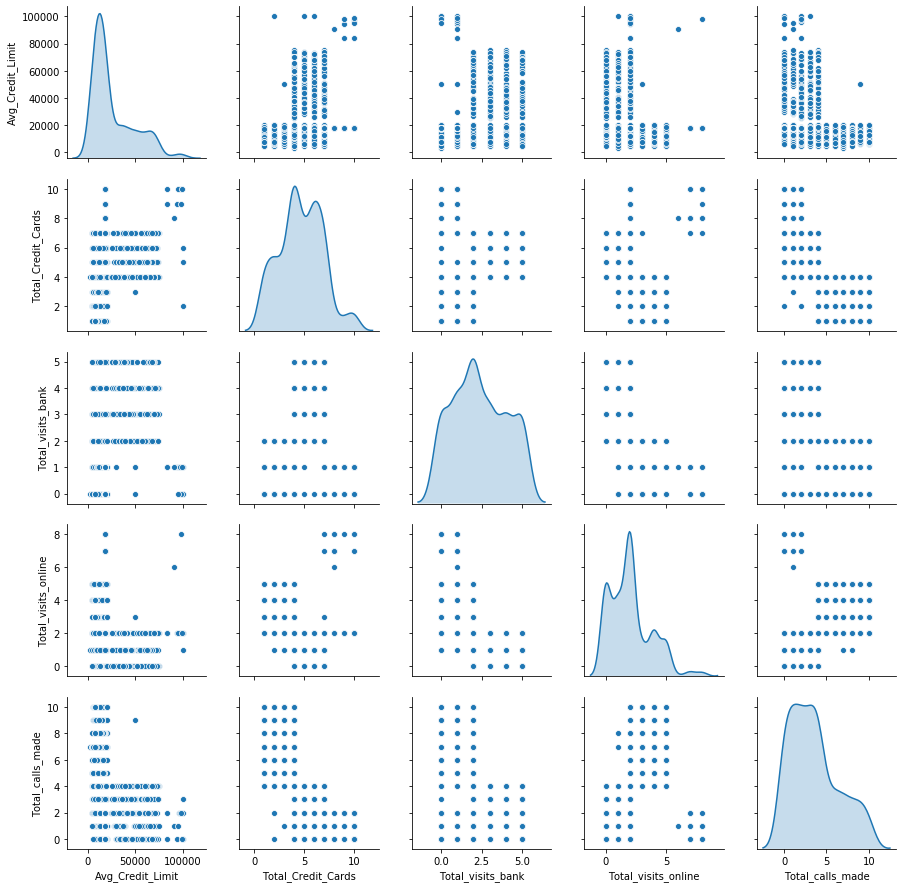

In [ ]:
# Doing pairplot to see the kernel density in the diagonals to have an idea of number of clusters

sns.pairplot(AllLife_df, diag_kind='kde')

### OBSERVATIONS
1. We can see about 3 clusters (that may be what we should be looking for, we don't know for sure)
2. This dataset is very good since the variables are all independent of each other

The dataset contains columns with different matrics e.g. amount in currency and counts (so we need to scale the dataset so one column will not dominate others

In [ ]:
AllLife_dfScaled =AllLife_df.apply(zscore)

In [ ]:
AllLife_dfScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.359885,-1.249225,-0.860451,-0.609464,-1.251537
1,1.073448,-0.787585,-1.473731,-0.019660,1.891859
2,1.073448,1.058973,-0.860451,0.570144,0.145528
3,0.158873,0.135694,-0.860451,-0.609464,0.145528
4,3.359885,0.597334,-1.473731,-0.019660,-0.203739


## Grouping Data into similar clusters -using KMeans Clustering

Using K-Means clustering to group data base on their attributes, but we need to know the optimal number of groups. For this we need to do the elbow best to know where it appears

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

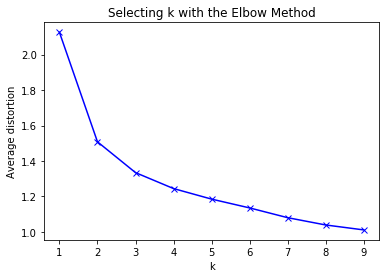

In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[] # we are looking for mean distortion for k one at a time

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(AllLife_dfScaled)
    prediction=model.predict(AllLife_dfScaled)
    meanDistortions.append(sum(np.min(cdist(AllLife_dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / AllLife_dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [ ]:
# we can see an elbow at 2 and 3

# Let us first start with K = 2 (by fittng a model and doing a prediction)
final_model=KMeans(2)
final_model.fit(AllLife_dfScaled) 
prediction=final_model.predict(AllLife_dfScaled)


# lets make new variables work for kmean2
AllLife_dfKMeans2 = AllLife_df.iloc[:,0:5] 
AllLife_dfScaledKMeans2 = AllLife_dfScaled.iloc[:,0:5]

#Append the prediction to our original and scaled dataset tables
AllLife_dfKMeans2["GROUP"] = prediction
AllLife_dfScaledKMeans2["GROUP"] = prediction
print("Groups Assigned : \n")
AllLife_dfKMeans2.head()

Groups Assigned : 



C:\Users\n.okorie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000.0,2,1,1.0,0,1
1,50000.0,3,0,2.0,9,0
2,50000.0,7,1,3.0,4,1
3,30000.0,5,1,1.0,4,1
4,100000.0,6,0,2.0,3,1


<b> Analyze the distribution of the data among the two groups (K = 2). One of the most informative visual tool is boxplot.</b>

In [ ]:
# using original dataset for better interpretation

AllLife_dfKMeans2 = AllLife_dfKMeans2.groupby(['GROUP'])
AllLife_dfKMeans2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12412.017167,2.656652,0.927039,3.695279,6.639485
1,34227.166276,5.824356,3.208431,1.126464,1.915691


### OBSERVATIONS
    
    1. Those who fall into group 0 obviously are high earning, hence the bank gives them higher average credit limits and
       there own about 5 credit cards and they have physical collaborations with the bank more
    
    2. But the group 1 even though they have more online visits and phone calls, it doesn't yield much for them.
    
    3. The group 0, i suppose have more transactions with the back since they are high earner and as such that may 
       warrant them visiting the bannk physically and have more bonding and authenticity with the bank

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204744ED710>,
      dtype=object)

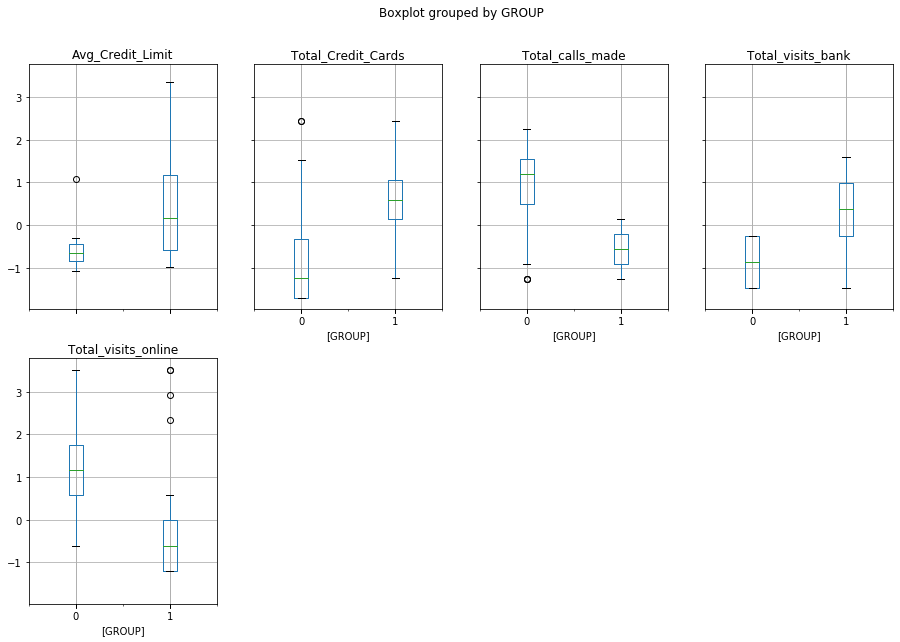

In [ ]:
# now lets use the scaled data to do a box plot becase we need variables that are equally weighed on the x-axis

AllLife_dfScaledKMeans2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [ ]:
# This visual plot shows graphically what the grouping above showed

In [ ]:
#  Let us next try with K = 3, the next elbow point

# But Running the commands after running for k=2 generates error, so to overcome this, I had to run this notebook again 
# from begining, but skip running the k=2 commands

final_model=KMeans(3)
final_model.fit(AllLife_dfScaled) 
prediction=final_model.predict(AllLife_dfScaled)

# lets make new variables work for kmean3
AllLife_dfKMeans3 = AllLife_df.iloc[:,0:5] 
AllLife_dfScaledKMeans3 = AllLife_dfScaled.iloc[:,0:5]

#Append the prediction to our original and scaled dataset tables
AllLife_dfKMeans3["GROUP"] = prediction
AllLife_dfScaledKMeans3["GROUP"] = prediction
print("Groups Assigned : \n")
AllLife_dfKMeans3.head()

Groups Assigned : 



C:\Users\n.okorie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000.0,2,1,1.0,0,1
1,50000.0,3,0,2.0,9,0
2,50000.0,7,1,3.0,4,1
3,30000.0,5,1,1.0,4,2
4,100000.0,6,0,2.0,3,1


In [ ]:
# using original dataset for better interpretation

AllLife_dfKMeans3 = AllLife_dfKMeans3.groupby(['GROUP'])
AllLife_dfKMeans3.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12262.222222,2.471111,0.920000,3.591111,6.835556
1,62033.333333,5.733333,3.080000,1.040000,1.993333
2,19098.245614,5.929825,3.217544,1.326316,1.852632


In [ ]:
# It still shows that those who visit the bank most have more total credit cards

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020473E3E2E8>,
      dtype=object)

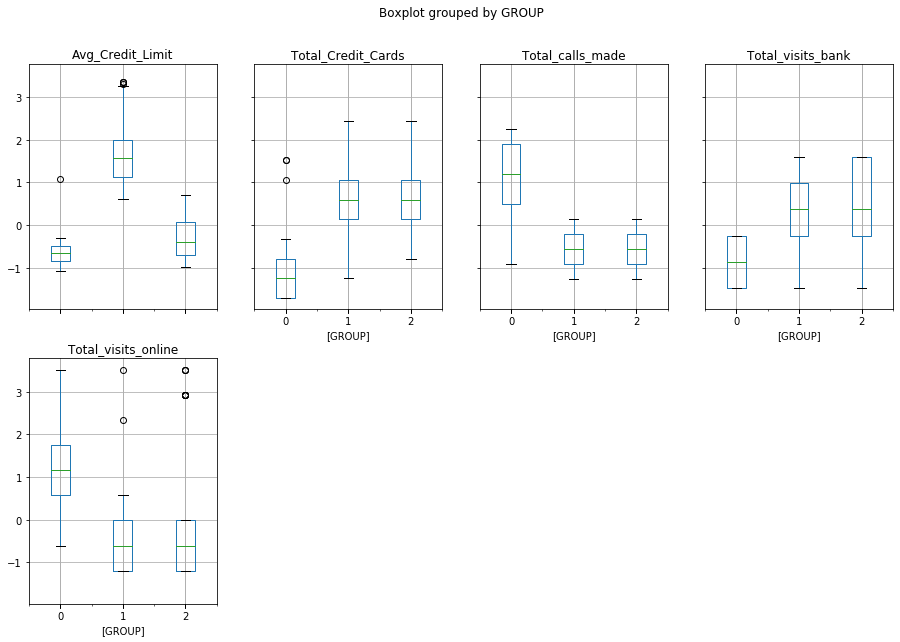

In [ ]:
# now lets use the scaled data to do a box plot becase we need variables that are equally weighed on the x-axis

AllLife_dfScaledKMeans3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [ ]:
# The lowest point of avg_credit_limit is higher that other groups, showing that each group is quite different from others

## Lets try out Hierarchical Clustering (cophenet indexing and Dendrogram)

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
#lets work by the 2 and 3 clusters that are identified

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [ ]:
AllLife_df.head() #Original dataset

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.0,2,1,1.0,0
1,50000.0,3,0,2.0,9
2,50000.0,7,1,3.0,4
3,30000.0,5,1,1.0,4
4,100000.0,6,0,2.0,3


In [ ]:
AllLife_dfScaled.head()  #scaled dataset

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.359885,-1.249225,-0.860451,-0.609464,-1.251537
1,1.073448,-0.787585,-1.473731,-0.019660,1.891859
2,1.073448,1.058973,-0.860451,0.570144,0.145528
3,0.158873,0.135694,-0.860451,-0.609464,0.145528
4,3.359885,0.597334,-1.473731,-0.019660,-0.203739


In [ ]:
AllLife_dfScaledAttr = AllLife_dfScaled.iloc[:,:] #duplicating the scaled dataset

In [ ]:

model.fit(AllLife_dfScaledAttr) #using the original dataset fit the model with AgglomerativeClustering algorithm

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [ ]:
AllLife_dforigDuplicate = AllLife_df.iloc[:,:] #duplicated the original dataset also

In [ ]:
# appending the labels column gotten from the fitting the model with the scaled data
AllLife_dforigDuplicate['labels'] = model.labels_
AllLife_dforigDuplicate.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000.0,2,1,1.0,0,1
1,50000.0,3,0,2.0,9,0
2,50000.0,7,1,3.0,4,0
3,30000.0,5,1,1.0,4,0
4,100000.0,6,0,2.0,3,1


In [ ]:
df_AllLife_clusts = AllLife_dforigDuplicate.groupby(['labels'])

In [ ]:
df_AllLife_clusts.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25397.798742,4.569182,2.468553,1.918239,3.680818
1,94833.333333,8.166667,0.666667,2.750000,1.250000
2,18000.000000,8.500000,0.666667,7.416667,0.750000


In [ ]:
# we are better able to interprete the unscaled original dataset above
# We see whereas lower average credit limits individual had higher number of total credit cards, Total visit of bank is
# a determining factor for a higher credit limit and here also total calls made matters

In [ ]:
# Lets plot the dendrogram to see if our result is consistent
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [ ]:
AllLife_dfScaledDendro = AllLife_dfScaledAttr.iloc[:,0:5]

In [ ]:
AllLife_dfScaledDendro.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.359885,-1.249225,-0.860451,-0.609464,-1.251537
1,1.073448,-0.787585,-1.473731,-0.019660,1.891859
2,1.073448,1.058973,-0.860451,0.570144,0.145528
3,0.158873,0.135694,-0.860451,-0.609464,0.145528
4,3.359885,0.597334,-1.473731,-0.019660,-0.203739


In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(AllLife_dfScaledDendro, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(AllLife_dfScaledDendro))

c

0.8304715486155523

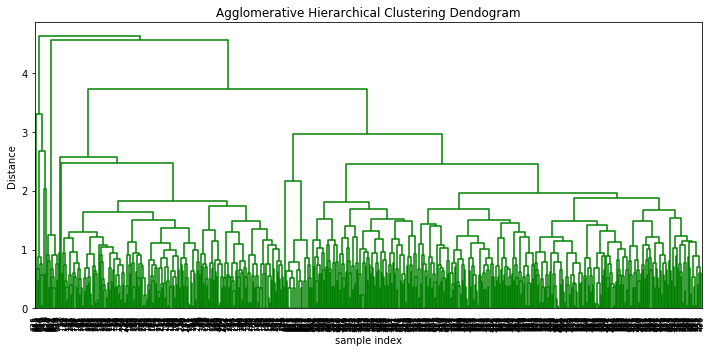

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# Taking our level at a distance of 4, we have 3 clusters

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(AllLife_dfScaledDendro, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(AllLife_dfScaledDendro))

c

0.7883094150879056

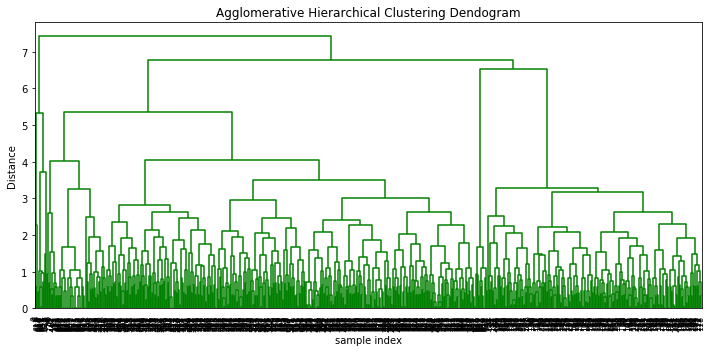

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# At a distance of 6 we see our 3 clusters 

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(AllLife_dfScaledDendro, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(AllLife_dfScaledDendro))

c

0.7311173425709666

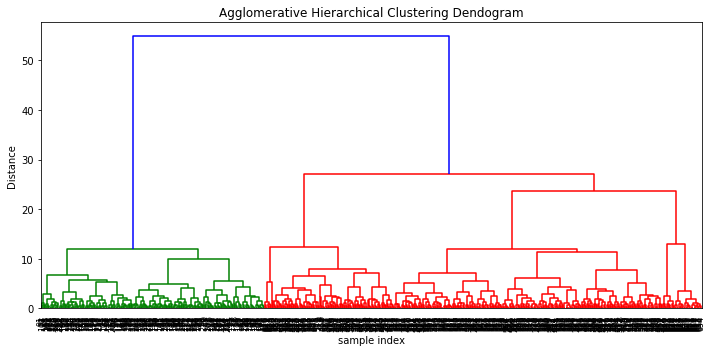

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# At a distance of about 25 we see our 3 clusters

### OBSERVATIONS
1. The cophenet index, c (which is the corelation coefficient for the pair-wise distance between any two points in the dataset to the dendrogramic distance. The higher the better, so the linkage using an 'average' method gives the best clustering and a better clustered distance which is 4, meaning the points are not too tight packed or too far apart, but just right at 4.
2. The dendrograms are somewhat looking alike but for the distance metric this is a good sign
3. Again we can clearly see 2, 3 and 4 clusters though the fourth is not well defined.

In [ ]:
 # Lets also try our Hierarchical Clustering with as few as 2 clusters straight away using linkage method 'average' only

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [ ]:
AllLife_dfScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.359885,-1.249225,-0.860451,-0.609464,-1.251537
1,1.073448,-0.787585,-1.473731,-0.019660,1.891859
2,1.073448,1.058973,-0.860451,0.570144,0.145528
3,0.158873,0.135694,-0.860451,-0.609464,0.145528
4,3.359885,0.597334,-1.473731,-0.019660,-0.203739


In [ ]:
AllLife_dfScaledAttr1 = AllLife_dfScaled.iloc[:,:] # we duplicate
AllLife_dfScaledAttr1.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.359885,-1.249225,-0.860451,-0.609464,-1.251537
1,1.073448,-0.787585,-1.473731,-0.019660,1.891859
2,1.073448,1.058973,-0.860451,0.570144,0.145528
3,0.158873,0.135694,-0.860451,-0.609464,0.145528
4,3.359885,0.597334,-1.473731,-0.019660,-0.203739


In [ ]:

model.fit(AllLife_dfScaledAttr1) #fit the model with AgglomerativeClustering algorithm

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [ ]:
AllLife_dforigDuplicate1 = AllLife_df.iloc[:,:] #duplicated the original dataset also

In [ ]:
AllLife_dforigDuplicate1['labels'] = model.labels_
AllLife_dforigDuplicate1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000.0,2,1,1.0,0,1
1,50000.0,3,0,2.0,9,0
2,50000.0,7,1,3.0,4,0
3,30000.0,5,1,1.0,4,0
4,100000.0,6,0,2.0,3,1


In [ ]:
AllLife_dfClust1 = AllLife_dforigDuplicate1.groupby(['labels'])

In [ ]:
AllLife_dfClust1.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25260.802469,4.641975,2.435185,2.020062,3.626543
1,94833.333333,8.166667,0.666667,2.750000,1.250000


In [ ]:
# Here we see that to have more average credit limit, the individuals had to have more total number of credit cards,
# and have to visit the banks online presence more

In [ ]:
AllLife_dfScaledDendro1 = AllLife_dfScaledAttr1.iloc[:,0:5]

In [ ]:
AllLife_dfScaledDendro1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.359885,-1.249225,-0.860451,-0.609464,-1.251537
1,1.073448,-0.787585,-1.473731,-0.019660,1.891859
2,1.073448,1.058973,-0.860451,0.570144,0.145528
3,0.158873,0.135694,-0.860451,-0.609464,0.145528
4,3.359885,0.597334,-1.473731,-0.019660,-0.203739


In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(AllLife_dfScaledDendro, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(AllLife_dfScaledDendro1))

c

0.8304715486155523

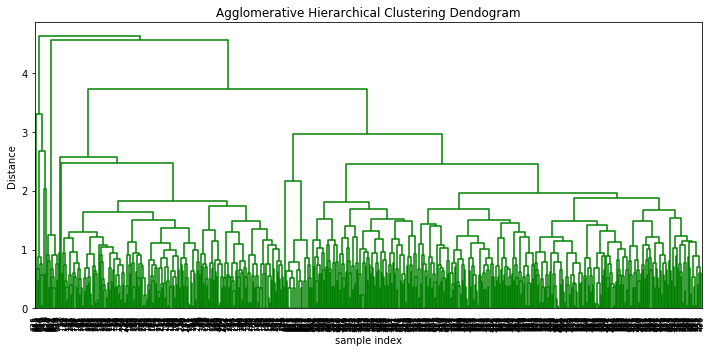

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

OBSERVATION:
I do not see any difference in the cophenet index and dendrogram of 2 and 3 clusters
This could mean this dataset have its elements or variables repeated in all the clusters.

### Lets finally do a Silhouette Analysis to know the optimal cluster number

Number Of Clusters:
2
Silhouette score value
0.4361286968368466
Number Of Clusters:
3
Silhouette score value
0.34938945432523133
Number Of Clusters:
4
Silhouette score value
0.3813704311171615
Number Of Clusters:
5
Silhouette score value
0.3400298696549468
Number Of Clusters:
6
Silhouette score value
0.24840908809745235
Number Of Clusters:
7
Silhouette score value
0.3154376665465241
Number Of Clusters:
8
Silhouette score value
0.2366813921400298
Number Of Clusters:
9
Silhouette score value
0.23594290357518446
Number Of Clusters:
10
Silhouette score value
0.22362115987872172
Number Of Clusters:
11
Silhouette score value
0.24041354426623646
Number Of Clusters:
12
Silhouette score value
0.22488740848777536
Number Of Clusters:
13
Silhouette score value
0.22958118026774474
Number Of Clusters:
14
Silhouette score value
0.22029663216303677
Number Of Clusters:
15
Silhouette score value
0.23180043474488438
Number Of Clusters:
16
Silhouette score value
0.2249177002054161
Number Of Clusters:
17
S

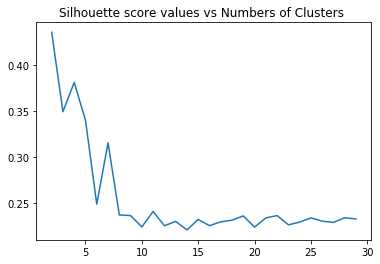

Optimal number of components is:
2


In [ ]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
 

silhouette_score_values=list()
 
NumberOfClusters=range(2,30)
 
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(AllLife_dfScaledDendro)
    labels= classifier.predict(AllLife_dfScaledDendro)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(AllLife_dfScaledDendro,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(AllLife_dfScaledDendro,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

### OBSERVATIONS AND CONCLUSION

1. From the silhouette analysis, we can see that the optimal number of clusters will be 2, having the highest silhouette score value
2. To answer our key questions:
   
   i.  We see two segments in our customers dataset
   
   ii. These segments are different from each other because we have clearly high earners and low earners, the high make more visit to the bank and they have more number of credit cards and even more average credit limits in their accounts
   
   iii. My advise to the bank on how to better service or market to this clients is that for the already high earners the bank should keep up with the collaborations during visits, keep their credit limits and even encourage them to have more. While to the lower earners, the bank should run a sort of collaborative program of first visiting with them in their locations and afterwards invite them to the bank for corporate meetings grant them a little more incentives to encourage them and make it easier for them to get multiple credit cards which will make their average credit limit increase till the bank gets the desired results.
   
   iv. And more so the bank should place more priority on number of credit cards and customer visitations than online and phone calls marketing
